In [1]:
import numpy as np
from sklearn.utils import shuffle

class LogisticRegression(object):
    
    #多クラスロジスティック回路
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.W = np.random.normal(size = (input_dim, output_dim))
        self.b = np.zeros(output_dim)
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        return softmax(np.matmul(x, self.W) + self.b)
    
    def compute_gradients(self, x, t):
        y = self.forward(x)
        delta = y - t
        dW = np.matmul(x.T, delta)
        db = np.matmul(np.ones(x.shape[0]), delta)
        return dW, db
    
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims = True)


np.random.seed(123)
#データの準備
M = 2 #入力データの次元
K = 3 #クラス数
n = 100 #クラスごとのデータ数
N = n * K #全データ数

x1 = np.random.randn(n, M) + np.array([0, 10])
x2 = np.random.randn(n, M) + np.array([5, 5])
x3 = np.random.randn(n, M) + np.array([10, 0])
t1 = np.array([[1, 0, 0] for i in range(n)])
t2 = np.array([[0, 1, 0] for i in range(n)])
t3 = np.array([[0, 0, 1] for i in range(n)])

x = np.concatenate((x1, x2, x3), axis = 0)
t = np.concatenate((t1, t2, t3), axis = 0)



#モデルの構築
model = LogisticRegression(input_dim = M, output_dim = K)



#モデルの学習
def compute_loss(t, y):
    return (-t * np.log(y)).sum(axis = 1).mean()

def train_step(x, t):
    dW, db = model.compute_gradients(x, t)
    model.W = model.W - 0.1 * dW
    model.b = model.b - 0.1 * db
    loss = compute_loss(t, model(x))
    return loss

epochs = 10
batch_size = 50
n_batches = x.shape[0] // batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x, t)
    
    for n_batch in range(n_batches):
        start = n_batch * batch_size
        end = start + batch_size
        
        train_loss += train_step(x_[start: end], t_[start: end])
        
    if epoch % 10 == 0 or epoch == epochs - 1:
        print("epoch: {}, loss: {:.3f}".format(epoch + 1, train_loss))
        
        
        
#モデルの評価
x_, t_ = shuffle(x, t)
preds = model(x_[0:5])
classified = np.argmax(t_[0:5], axis = 1) == \
             np.argmax(preds[0:5], axis = 1)
print("Prediction matched:", classified)




epoch: 1, loss: 100.495
epoch: 10, loss: 0.000
Prediction matched: [ True  True  True  True  True]


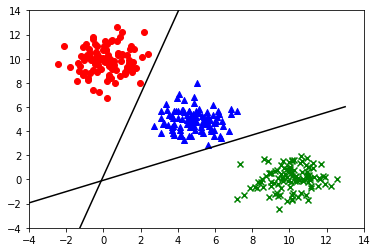

In [2]:
import matplotlib.pyplot as plt

for i in range(n):
    plt.scatter(x1[i, 0], x1[i, 1], marker = "o", color = "red")
    plt.scatter(x2[i, 0], x2[i, 1], marker = "^", color = "blue")
    plt.scatter(x3[i, 0], x3[i, 1], marker = "x", color = "green")

X = np.arange(-4, 14)
Y1 = - ((model.W[0, 0] - model.W[0,1]) * X + model.b[0] - model.b[1]) \
    / (model.W[1, 0] - model.W[1, 1])
plt.plot(X, Y1, color = "black")

Y2 = - ((model.W[0, 1] - model.W[0, 2]) * X + model.b[1] - model.b[2]) \
    / (model.W[1, 1] - model.W[1, 2])
plt.plot(X, Y2, color = "black")

plt.xlim([-4, 14])
plt.ylim(-4, 14)
plt.show()

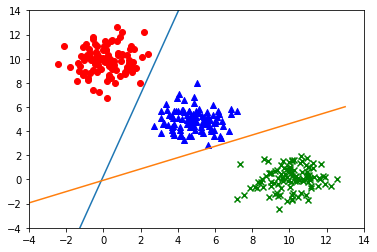

In [7]:
import matplotlib.pyplot as plt
import make_graph as g

g.scatter(x1, Color = "red", Marker = "o")
g.scatter(x2, Color = "blue", Marker = "^")
g.scatter(x3, Color = "green", Marker = "x")
g.line(model.W, model.b, Index = [0, 1])
g.line(model.W, model.b, Index = [1, 2])
plt.xlim(-4, 14)
plt.ylim(-4, 14)
plt.show()

In [63]:
importlib.reload(make_graph)

<module 'make_graph' from 'C:\\Users\\Robotics\\Desktop\\ws_tensorflow\\practice\\make_graph.py'>

In [28]:
print(model.W.shape)

(2, 3)


In [43]:
print(model.W)

[[-16.78367259   2.85914379  14.54225345]
 [ 12.54449744   6.75479005 -18.19611258]]


In [44]:
print(model.b)

[-0.53256839  1.07912225 -0.54655386]
